# Internship competition: Predict the correct house prices!

## Fictitious assignment
An online platform for buying and selling apartments wants to develop an app to attract more potential sellers. The app should reliably predict the
selling price based on some key data about an apartment. 


Everyone will receive
- `house_price_data.csv`, a data set with features/variables for different houses and the label (here: house price). This can be used to train and test models.
- `house_price_data_unknown.csv` is a data set with houses for which the price is unknown.

## Goal: Predict house prices as accurately as possible
At the end, all teams should submit their price predictions for the houses in `house_price_data_unknown.csv`. After submission, the predictions will be compared with the actual values (using MAE, mean absolute error). The team with the most accurate predictions (according to the MAE value) wins :)

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', 100)

# Let's get started... Import and explore data

- As always, import the data using `pd.read_csv` (`house_price_data.csv`)
- The column `price` contains our label (or target variable).
- Are there any missing values?
- Are there any outliers/incorrect/strange entries?

--> `.describe()` & `.info()`

In [2]:
filename = r"C:\Users\Sander\Repos\DataScience\Data\Daten für Machine Learning Competition-20250528\house_price_data.csv"  # set to your own path

data = pd.read_csv(filename)
data = data.set_index('id')

In [3]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
5420300210,258000.0,3,1.75,2090,7461,1.0,0,0,3,6,1200,890,1986,0,98030,47.3764,-122.184,1420,7462
629000510,1185000.0,4,2.75,3020,8622,2.0,0,0,3,9,3020,0,1976,2003,98004,47.5866,-122.201,3060,14303
1338801060,560000.0,4,1.50,1810,3400,2.0,0,0,3,8,1810,0,1926,0,98112,47.6264,-122.302,1770,3600
7338000150,160000.0,2,1.00,1070,4200,1.0,0,0,4,6,1070,0,1983,0,98002,47.3336,-122.215,1150,4200
1441000090,485000.0,4,3.50,3273,5115,2.0,0,0,3,8,2671,602,2014,0,98055,47.4477,-122.204,2996,5100


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5420300210 to 3693901801
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          10000 non-null  float64
 1   bedrooms       10000 non-null  int64  
 2   bathrooms      10000 non-null  float64
 3   sqft_living    10000 non-null  int64  
 4   sqft_lot       10000 non-null  int64  
 5   floors         10000 non-null  float64
 6   waterfront     10000 non-null  int64  
 7   view           10000 non-null  int64  
 8   condition      10000 non-null  int64  
 9   grade          10000 non-null  int64  
 10  sqft_above     10000 non-null  int64  
 11  sqft_basement  10000 non-null  int64  
 12  yr_built       10000 non-null  int64  
 13  yr_renovated   10000 non-null  int64  
 14  zipcode        10000 non-null  int64  
 15  lat            10000 non-null  float64
 16  long           10000 non-null  float64
 17  sqft_living15  10000 non-null  int64  
 1

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.385561e+05,3.360900,2.109625,2076.158600,1.506738e+04,1.494400,0.007300,0.234100,3.398800,7.651800,1788.642900,287.515700,1971.342500,81.621900,98077.697400,47.559925,-122.211507,1981.223900,12777.594300
std,3.533016e+05,0.911337,0.768072,918.446593,4.016195e+04,0.543965,0.085132,0.766522,0.647611,1.180549,823.392012,442.101782,29.175001,395.287081,53.419386,0.137368,0.142087,682.254754,26635.666711
min,8.000000e+04,0.000000,0.000000,370.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,620.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.099250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.470275,-122.326000,1480.000000,5120.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571550,-122.227000,1840.000000,7626.500000
75%,6.420000e+05,4.000000,2.500000,2550.000000,1.065050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98117.000000,47.677400,-122.123000,2360.000000,10120.500000
max,3.850000e+06,11.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,560617.000000


## Graphical overview over all features

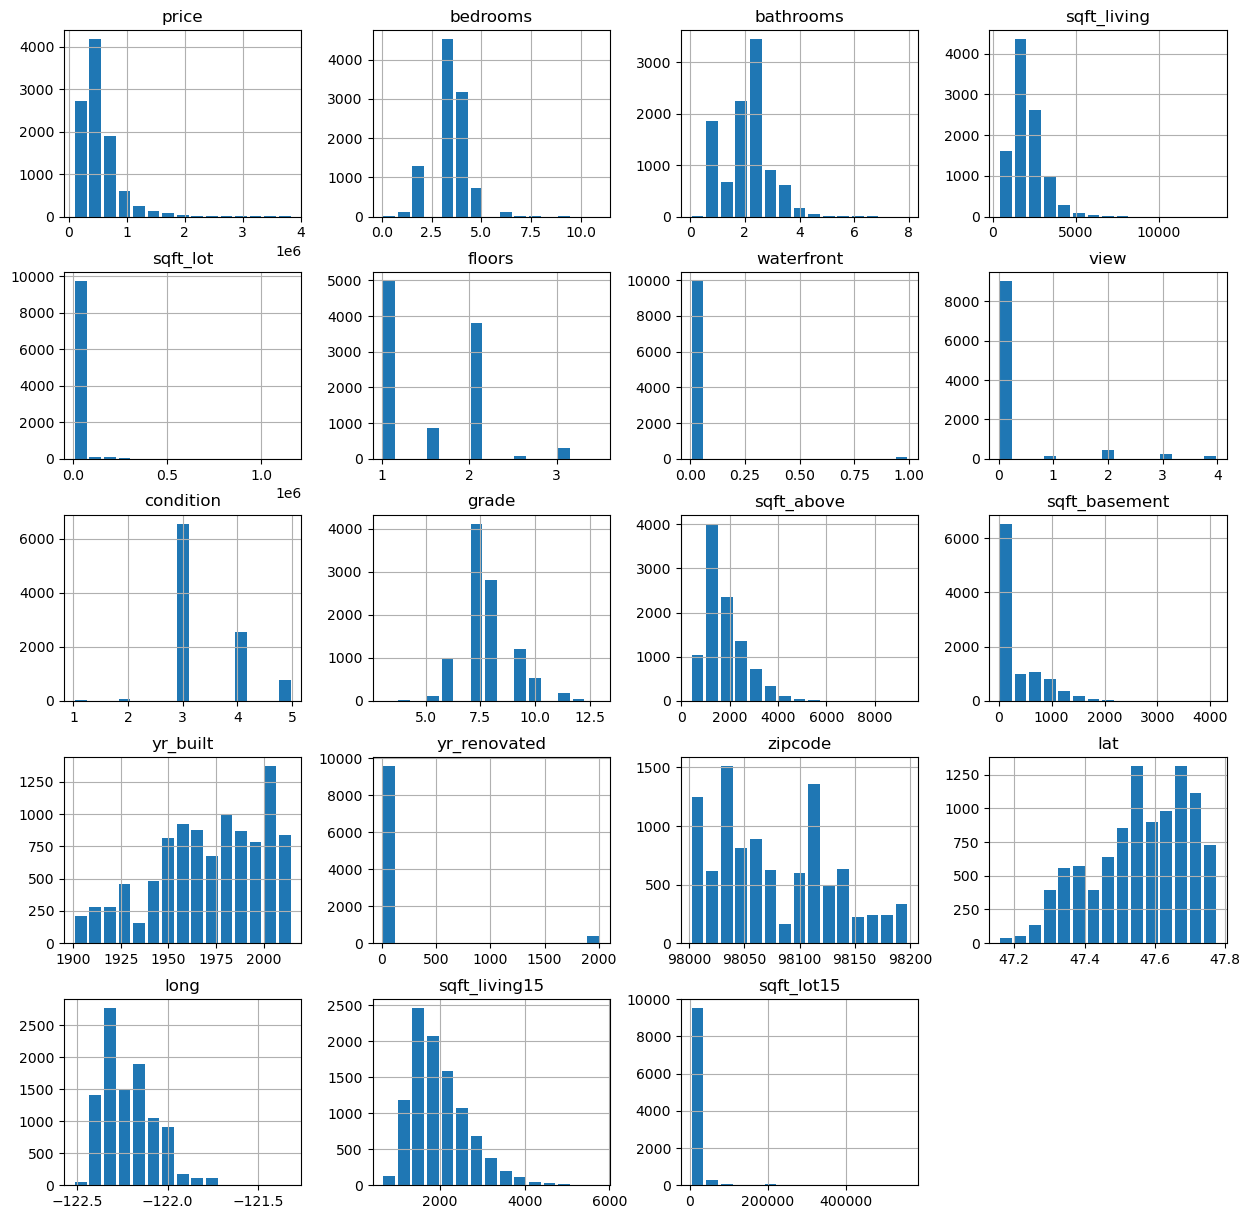

In [6]:
data.hist(figsize=(15, 15), bins=15, rwidth=0.8)
plt.show()

## Correlations!?
- Are there meaningful correlations with our target label (`price`)? If so, does this make us confident that we can train a model to predict the price?
- Are there any features with suspiciously high (or low) correlations that could be a sign of duplication?

<Axes: >

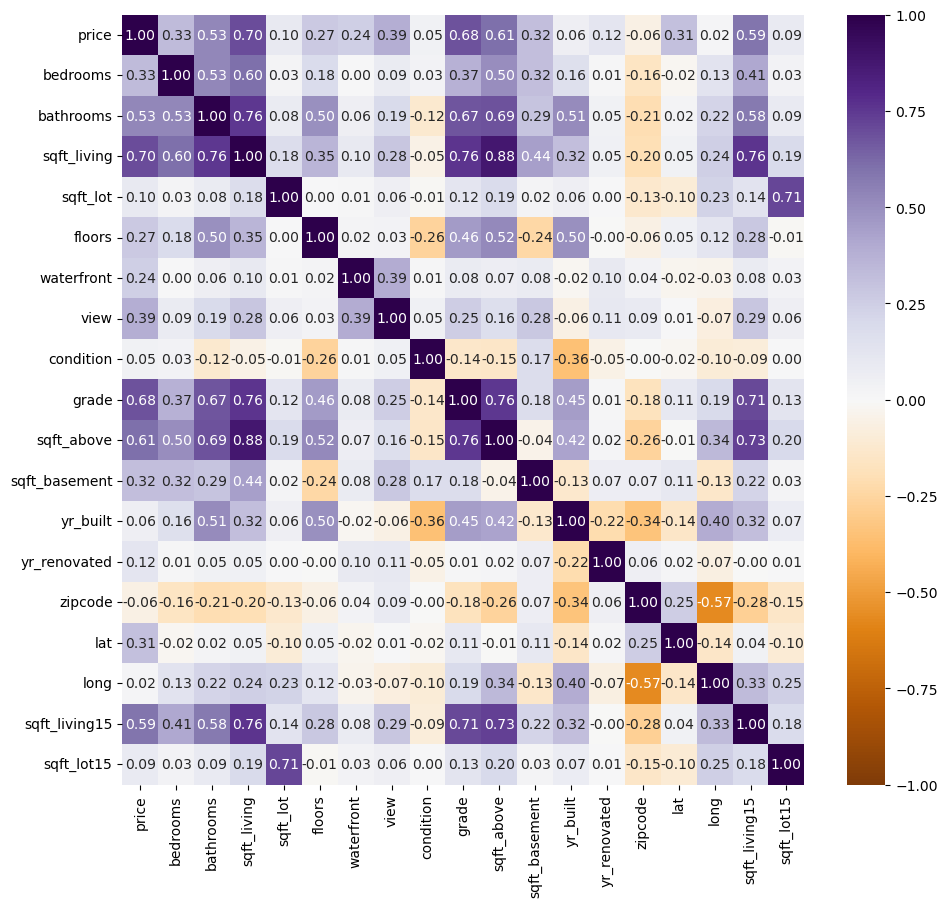

In [7]:
fig, ax = plt.subplots(figsize=(11, 10))

sb.heatmap(
    data.corr(),
    annot=True, cmap="PuOr",fmt=".2f",
    vmin=-1, vmax=1
)

# Data cleaning & division data --> X, y
- Remove missing values (if any)
- Remove columns that are not to be used by the machine learning models.
(e.g. with `.drop(..., axis=1)`)
- Convert columns that contain categories (depending on the model).
- Split the data into `X` (without the label) and `y` (only the labels)

In [15]:
data_test = data.get_dummies(data["grade"]) 

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [16]:
data = data.drop(["waterfront"], axis=1)
X = data.drop(["price"], axis=1)
y = data["price"]

KeyError: "['waterfront'] not found in axis"

# Searching for the "right" model...

This is about a regression model. There are many options! See, for example, https://scikit-learn.org/stable/supervised_learning.html

Possible candidates would be:

- `sklearn.linear_model import LinearRegression`
- `sklearn.tree.DecisionTreeRegressor`
- `sklearn.neighbors.KNeighborsRegressor`
- `sklearn.ensemble.RandomForestRegressor`

**Caution: Please do not use any of the neural networks from Scikit-Learn.**

## Warning: Some of the models may require a lot of time for training (or even prediction).
(Therefore, it is better to work on several computers in a team).

---

## Quick guide to using Scikit-Learn models

### General procedure: Initialize, train, predict
The models in Scikit-Learn are always executed according to the same principle.

1) Create object: `my_model = SomeFancyModel(parameter1=4, ...)` 
2) Train model: `my_model.fit(X, y)`
3) Make predictions: `my_model.predict(X_new)`

### Model parameters – which ones are there?

We get a list of all modifiable parameters via `my_model.get_params()` (this also works for pipelines).

However, to understand exactly what each parameter does, we need to look at the Scikit-Learn documentation (https://scikit-learn.org/stable/supervised_learning.html).

### Pipelines

In Scikit-Learn, the various processing steps can be linked in a pipeline. This makes sense if data processing is part of the model, for example if the data needs to be scaled. Here is an example:

```python
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
("scale", StandardScaler()),
("model", KNeighborsRegressor())
])
```
A pipeline object is then treated like a model, i.e., training is done with `pipe.fit()` and prediction with `pipe.predict()`.


### Grid search
To test multiple conditions of a model (or pipeline), a so-called "grid search" is useful, i.e., simply running through all possible parameter combinations.

Here is an example:

```python
grid = GridSearchCV(estimator=my_model,
param_grid={
‘parameter_whatever’: [3, 5, 7]
},
cv=3,
verbose=2)
```

A GridSearchCV object is then treated similarly to a model, i.e., training is done with `grid.fit()`. We get the results of the search via `grid.cv_results_` (Python dictionary), or to display them a little better via `pd.DataFrame(grid.cv_results_)`.

Multiple parameters can also be tested simultaneously, in which case all combinations are trained and tested accordingly.

Other information about grid search:
- `cv` stands for *cross validation*.
- `verbose` specifies how much information should be output during training (default is 0, which outputs nothing; slightly more information is provided in ascending order with 1, 2, 3).

### Grid search scoring

If nothing else is specified, GridSearch simply uses a metric that is specified by default for the respective model type. However, this can vary greatly depending on the model. If different models are to be compared with each other, it is often necessary to specify a common "score." This can be done as follows:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer

grid = GridSearchCV(estimator=my_model,
param_grid={
‘model__whatever’: [5, 10, 20]
},
scoring={"MAE": make_scorer(mean_absolute_error,
greater_is_better=False)},
cv=3, refit="MAE")
```

### Explore results

One option is a scatter plot:
```python
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, pipe.predict(X_test), alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
```

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, make_scorer

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 17), (2000, 17), (8000,), (2000,))

### Pipe 1

In [11]:
pipe = Pipeline([
    ("scale", StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression(fit_intercept=False, positive=True))])

In [12]:
grid = GridSearchCV(estimator=pipe,
param_grid={
'poly__degree': [2,3,4,5]
},
scoring={"MAE": make_scorer(mean_absolute_error,
greater_is_better=True)},
cv=3, refit="MAE")

In [13]:
#grid.fit(X_test,y_test)

In [14]:
grid_pipe_pred = grid.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'poly__degree': 3}
242241.91243192417


### Pipe1 Result

96178.61800101609


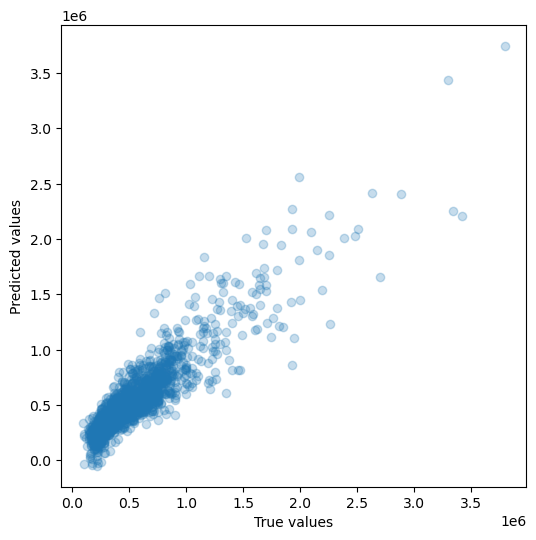

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, grid_pipe_pred, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

print(mean_absolute_error(y_test,grid_pipe_pred))

### 2. Pipe

In [ ]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('RandomForest', RandomForestRegressor(n_estimators=10, max_features=2, max_leaf_nodes=5,random_state=0)),])

In [ ]:
grid2 = GridSearchCV(estimator=pipe2,
param_grid={
'RandomForest__n_estimators': [10, 25, 50,100],
'RandomForest__max_features': [2,3,4],
'RandomForest__max_leaf_nodes': [3,5,10],
},
scoring={"MAE": make_scorer(mean_absolute_error,
greater_is_better=True)},
cv=3, refit="MAE")

In [ ]:
grid2.fit(X_test,y_test)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RandomForest',
                                        RandomForestRegressor(max_features=2,
                                                              max_leaf_nodes=5,
                                                              n_estimators=10,
                                                              random_state=0))]),
             param_grid={'RandomForest__max_features': [2, 3, 4],
                         'RandomForest__max_leaf_nodes': [3, 5, 10],
                         'RandomForest__n_estimators': [10, 25, 50, 100]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict')})

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

{'RandomForest__max_features': 2, 'RandomForest__max_leaf_nodes': 3, 'RandomForest__n_estimators': 10}
180855.36589751707


### Pipe2 Result

180200.75177978512


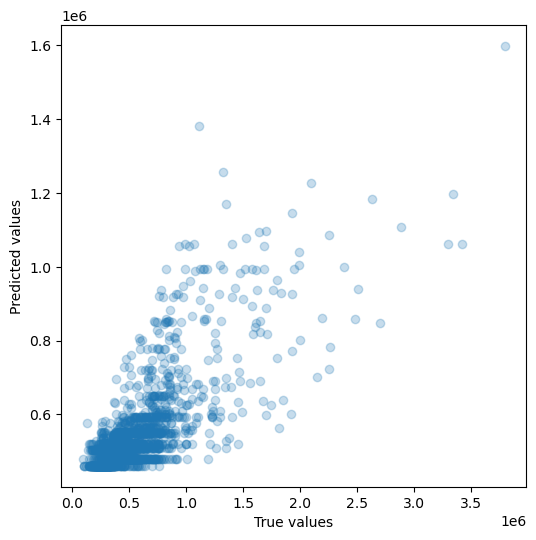

In [ ]:
grid_pipe_pred = grid2.predict(X_test)
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, grid_pipe_pred, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

print(mean_absolute_error(y_test,grid_pipe_pred))

### Pipe 3

In [17]:
pipe3 = Pipeline([
    ("scale", StandardScaler()),
    ("KNN", KNeighborsRegressor(n_jobs=-1)),
    ])

grid3 = GridSearchCV(estimator=pipe3,
    param_grid={
        'KNN__n_neighbors': [2,3,4,5,9]
        },
    scoring={"MAE": make_scorer(mean_absolute_error,
    greater_is_better=True)},
    cv=3, refit="MAE")


In [19]:
grid3.fit(X_test,y_test)
print(grid3.best_params_)
print(grid3.best_score_)


{'KNN__n_neighbors': 2}
120405.7306057932


In [20]:
grid_pipe_pred = grid3.predict(X_test)

In [21]:
print(mean_absolute_error(y_test,grid_pipe_pred))

64377.85925


### Pipe 3 Result

64377.85925


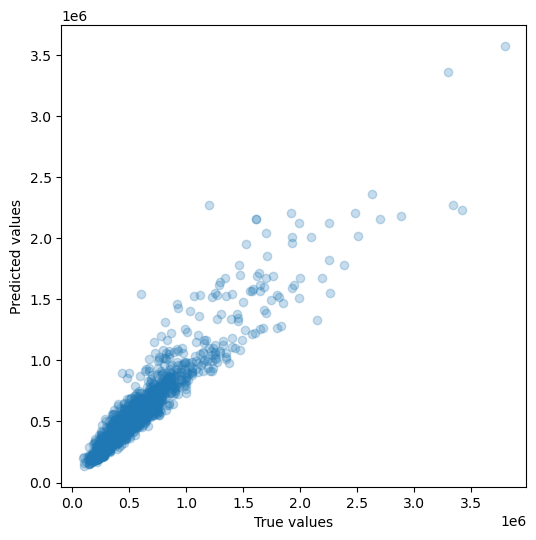

In [ ]:
grid_pipe_pred = grid3.predict(X_test)
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test, grid_pipe_pred, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")

print(mean_absolute_error(y_test,grid_pipe_pred))

---
# Finally: the test!

Once the appropriate model and parameters have been found, predictions can be made on the unknown test data!

These are located in the file `house_price_data_unknowns.csv`.

Most of the code for this is in the following cells.

In [26]:
filename = "Data\Daten für Machine Learning Competition-20250528\house_price_data_unknowns.csv"

data_competition = pd.read_csv(filename)
data_competition.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3329500060,4,2.50,2250,9091,1.0,0,0,3,7,1340,910,1982,0,98001,47.3360,-122.269,1540,7802
1,1125059071,4,3.25,3340,10890,1.5,0,0,3,9,2240,1100,1963,2000,98052,47.6677,-122.136,2880,9794
2,3024079096,4,2.50,2600,118666,1.0,0,0,3,7,1400,1200,1981,0,98027,47.5400,-121.970,2440,131116
3,4442800008,3,2.00,1340,1480,3.0,0,0,3,8,1340,0,1997,0,98117,47.6904,-122.393,1340,1321
4,5101405604,1,1.00,900,6380,1.0,0,0,3,6,900,0,1947,0,98125,47.7019,-122.311,1830,6380


## Make your FINAL predictions!

In [28]:
data_competition.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [32]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [33]:
predicted_prices = grid3.predict(data_competition.drop(["id","waterfront"], axis=1))
predicted_prices

array([ 268250. , 1395000. ,  447500. ,  428000. ,  378300. ,  267500. ,
        451500. ,  694350. ,  441500. ,  401362.5,  619500. ,  222500. ,
        365475. ,  423250. ,  292500. ,  460000. ,  251500. ,  322500. ,
        405000. ,  319945. ,  547000. ,  325000. ,  469250. ,  853750. ,
        599250. ,  484000. ,  639500. , 1407500. ,  920000. ,  292500. ,
        701500. ,  471000. ,  295500. ,  694500. ,  243250. ,  374500. ,
        254500. ,  462475. ,  306500. ,  512000. ,  653900. ,  540000. ,
        742352. ,  366000. ,  265000. , 1026300. , 1337500. ,  984000. ,
        927500. ,  421359. ,  589975. ,  812500. ,  280000. ,  380975. ,
        310500. ,  402475. ,  503101.5, 1401250. ,  305000. , 1194500. ,
        560250. ,  883000. ,  246500. ,  215000. ,  252500. ,  365000. ,
        207500. ,  348500. ,  427250. ,  811750. ,  353475. ,  278500. ,
        233975. ,  211750. ,  452475. ,  356575. ,  700250. ,  552500. ,
        440000. ,  610000. , 1092550. ,  593950. , 

## Create your FINAL results!
Hier ordnen wir nur die Vorhersagen den "id" zu.

In [34]:
competition_results = pd.DataFrame({"id": data_competition["id"],
                                    "price": predicted_prices})
competition_results                                

,id,price
0,3329500060,268250.0
1,1125059071,1395000.0
2,3024079096,447500.0
3,4442800008,428000.0
4,5101405604,378300.0
...,...,...
95,1085622540,351197.5
96,2895800750,286500.0
97,7853230590,432475.0
98,8563000770,489995.0


## Save results! (and when done --> upload on Moodle)
- Should be obvious, but: **please replace `name1_name2` by your names.

In [35]:
filename = "house_price_predictions_Sander.csv"

competition_results.to_csv(filename)

### Good luck!